# Exercise Sheet 1: Spike rate estimation
Leonard Hollander

In [148]:
import numpy as np
import matplotlib.pyplot as plt
import os 

from typing import Optional

In [2]:
spike_times = np.loadtxt('ExampleSpikeTimes1.dat.txt') / 1000

$\textbf{Part [a]: Plotting the raw spike train}$

Text(0.5, 0, 'Spikes at time in $ms$')

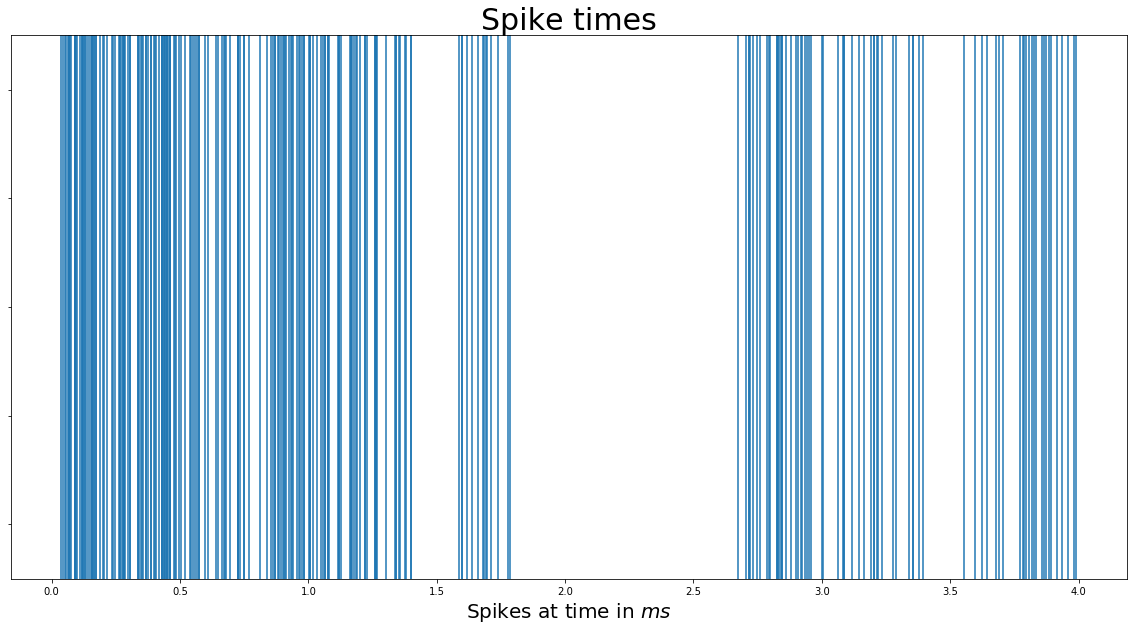

In [3]:
plt.figure(figsize = (20,10))

plt.eventplot(spike_times,\
              orientation = 'horizontal',\
              label = 'spikes')

plt.tick_params(axis = 'y', labelleft = False)
plt.ylim((0.5,1.5))            
plt.title('Spike times', fontsize = 30)
plt.xlabel('Spikes at time in $ms$', fontsize = 20)


$\textbf{Part [b]: Spike-count histograms}$

[ 20  50 150]


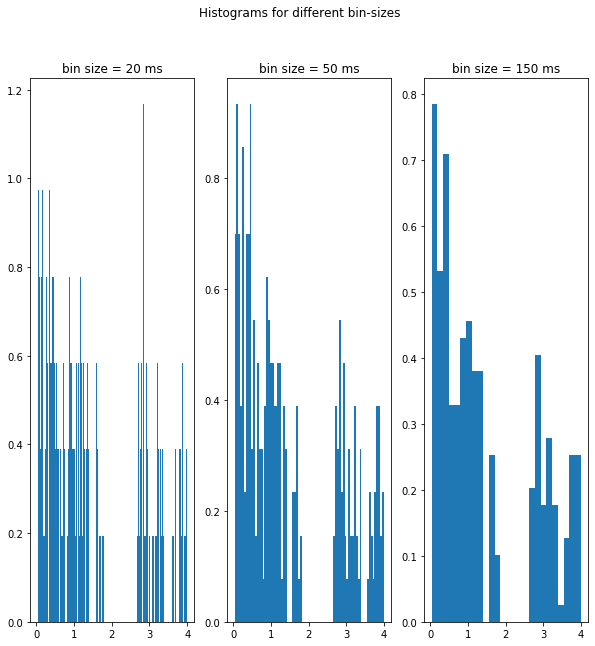

In [4]:
bin_sizes = np.array([20,50,150])

bin_num = (4000 / bin_sizes).astype(int)

print(bin_sizes)

fig, axs = plt.subplots(1,3, figsize = (10,10))

plt.suptitle('Histograms for different bin-sizes')

for binI, bins in np.ndenumerate(bin_num):
    
    axs[binI].hist(spike_times, bins = bins, density = True)
    axs[binI].set_title("bin size = {} ms".format(bin_sizes[binI]))


$\textbf{Part [c]: Window function:}$

In [151]:
rho = lambda t: np.sum(np.where(t - spike_times == 0, 1, 0))

rho_trial = [rho(time) for time in spike_times]

trial_times = np.linspace(0,4, 260)

def convolution(window, wp: Optional):
    
    """
    Returns the convolution of window with spike times
    @params:
    window: the kind of window to be used
    wp: a window paramater that can be used to scale e.g.
    the width of the window 
    """
    
    w = np.array([window(time, wp) for time in trial_times - spike_times])
    
    return np.convolve(w, rho_trial, 'full')

$\textbf{The different kinds of windows:}$

In [153]:

#(i) Rectangular window:

rec_window = lambda tau, dt: 1/dt if -dt/2 <= tau < dt/2 else 0

#(ii) Gaussian window: returns an array of functions

def gaussian(tau, sigma, mu = 0):
    
    normaliser = 1/(np.sqrt(2 * np.pi) * sigma)
    
    return normaliser * np.exp(-np.power(tau,2) \
                               / (2 * np.power(sigma,2 )))

#(iii) Alpha function:

alpha_func = lambda tau, alpha: np.abs(np.power(alpha,2) \
                                * tau * np.exp(- alpha * tau)) 
                            

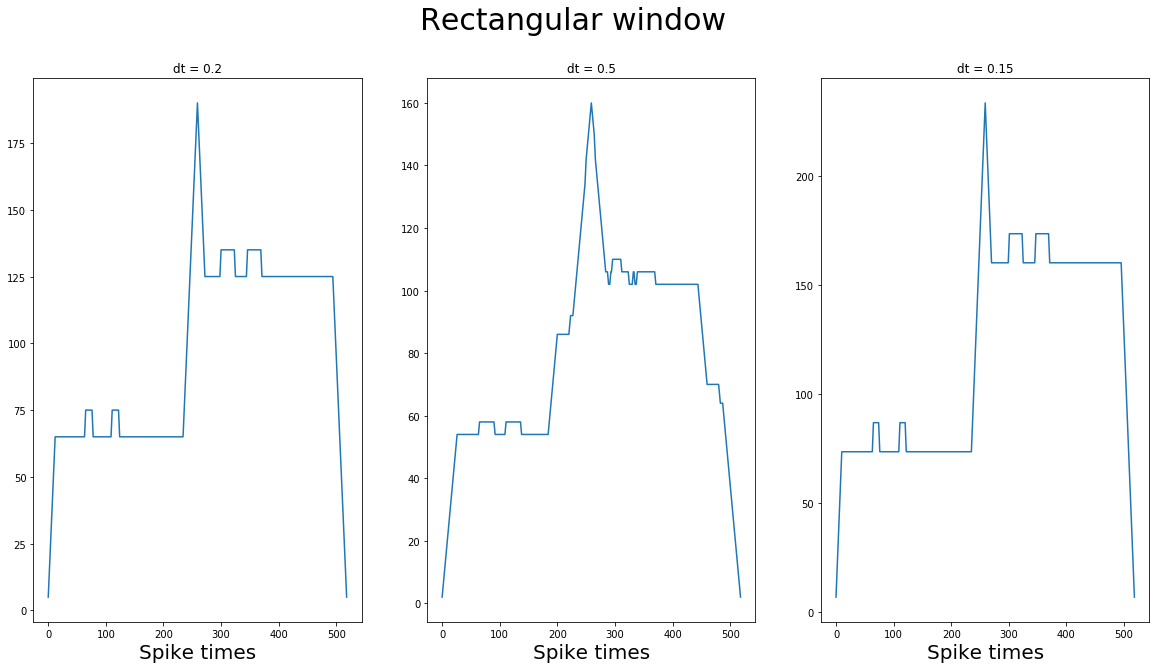

In [162]:
#Plotting the convolved results:

def plot_rec_window():

    fig, axs = plt.subplots(1,3, figsize = (20,10))
    
    plt.suptitle("Rectangular window", fontsize = 30)

    for pI, p in np.ndenumerate(np.array([.2, .5, .15])):
        
        axs[pI].plot(convolution(rec_window, p))
        axs[pI].set_title("dt = {}".format(p))
        axs[pI].set_xlabel("Spike times", fontsize = 20)
        
plot_rec_window()

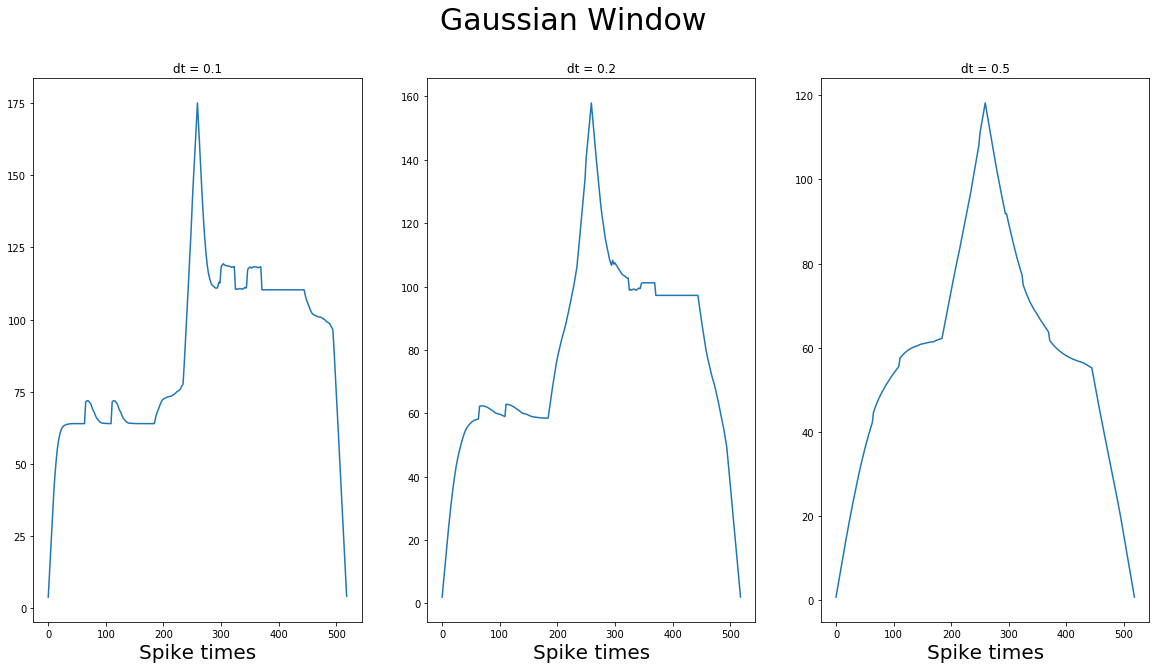

In [161]:
def plot_gauss_window():

    fig, axs = plt.subplots(1,3, figsize = (20,10))
    
    plt.suptitle("Gaussian Window", fontsize = 30)

    for pI, p in np.ndenumerate(np.array([.1, .2, .5])):
        
        axs[pI].plot(convolution(gaussian, p))
        axs[pI].set_title("dt = {}".format(p))
        axs[pI].set_xlabel("Spike times", fontsize = 20)
        
plot_gauss_window()

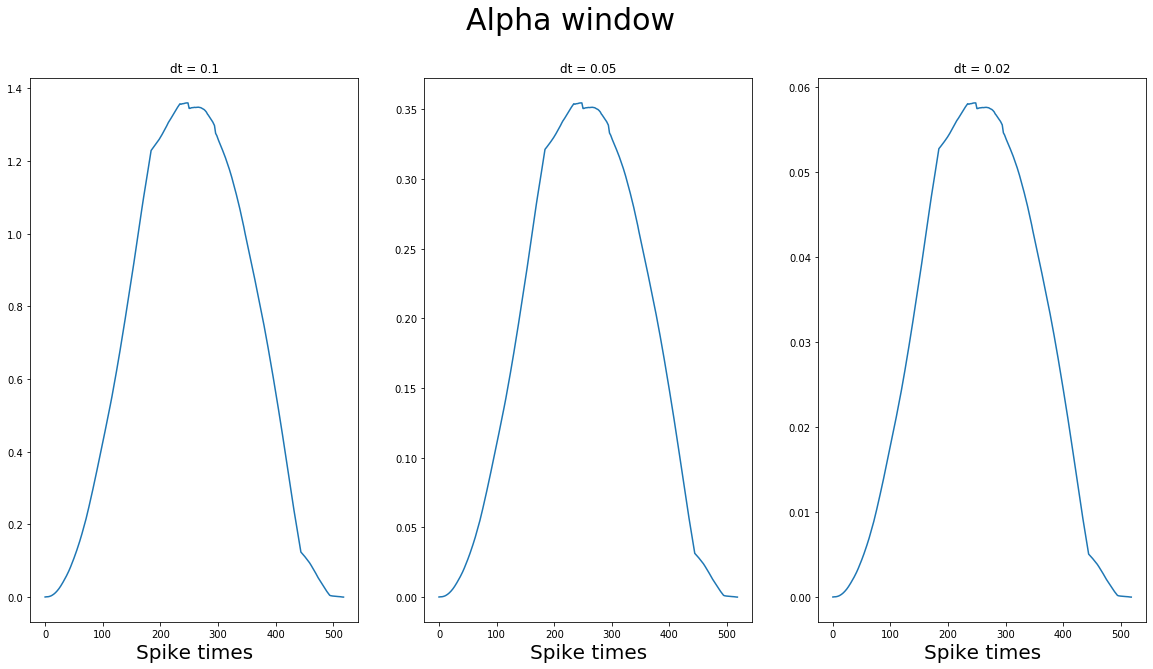

In [159]:
def plot_alpha_window():

    fig, axs = plt.subplots(1,3, figsize = (20,10))
    
    plt.suptitle("Alpha window", fontsize = 30)

    for pI, p in np.ndenumerate(np.array([.1, 0.05, 0.02])):
        
        axs[pI].plot(convolution(alpha_func, p))
        axs[pI].set_title("dt = {}".format(p))
        axs[pI].set_xlabel("Spike times", fontsize = 20)
        
plot_alpha_window()

So we can see how choosing different kinds of windows with different kinds of parameters affects the resultant firing rate estimates. In this case the Gaussian window seems to work best. While the rectangular window appears to be too 'choppy', the alpha function actually is too smooth so a lot of information is lost. 

$\textbf{Part[d]: Spike count rate}$

In [164]:

#This is already part (d):

spike_count = lambda t: np.sum([1 if t == spike_time else 0 \
                            for spike_time in spike_times])

spike_count_rate = len(spike_times) / 4

print("The spike count rate is {} spikes/second".format(spike_count_rate))

The spike count rate is 65.0 spikes/second
